<div class="alert alert-block alert-success">
<h1>Coupon Collector's Problem</h1>
</div>

# Import library and necessary modules

In [46]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import random
import ipywidgets as widgets
from ipywidgets import interact
from tqdm import tqdm
import gif
%matplotlib inline

# Functions

In [47]:
def create_simulations(no_distinct_coupons, run_times):
    """
    Implementation logic: 
    For each simulation, we will record the number of rolls until all values (coupons) have been seen. 
    We will make N simulations and store the number of 'draws'.
    
    Parameters:
    no_distinct_coupons: number of different coupons
    run_times: the number of running times
    
    Return: times it took to achieve such goal
    """
    
    simulations = []
    coupons = range(no_distinct_coupons)

    for i in range(run_times):
        coupons_gathered = set()
        length = 0

        while len(coupons_gathered)<no_distinct_coupons:
            current_coupon = random.choice(coupons)
            coupons_gathered.update([current_coupon])
            length+=1

        simulations.append(length)
        
    return simulations

In [48]:
def create_statistics_after_n_simulations(simulations):
    """
    Implementation logic: 
    After n simulations, we will record the statistical values - min, max, average - until we finish N simulations.
    
    Parameters:
    simulations: the set of simulation's results
    
    Return: statistical values
    """
    
    minimum_values = []
    maximum_values = []
    average_values = []

    total = 0  # Initialize the total for calculating the average

    for i, value in enumerate(simulations):
        total += value  # Update the total for the average
        current_sublist = simulations[:i + 1]  # Extract the sublist up to the current element

        minimum_values.append(min(current_sublist))  # Calculate and append the minimum value
        maximum_values.append(max(current_sublist))  # Calculate and append the maximum value
        average_values.append(int(total / (i + 1)))  # Calculate and append the average value
    
    return minimum_values, maximum_values, average_values

# Variables

In [49]:
run_times = 10000 # Number of simulations
no_distinct_coupons = 100 # Number of unique coupons

<div class="alert alert-info">
  <h1>Visualisation</h1>
</div>

## Interactive Visualisation

In [50]:
# Parameters for the visualisation
value_increment = 1
values = np.arange(0, 2000, 300)
columns = ['Min', 'Max', 'Avg']

def plot_func(run_times):
 
    cell_text = cell_texts[run_times - 1]
    
    #Plot the bar plot for three values: min, max, and average
    plt.bar(range(len(cell_text)), cell_text, color='royalblue', alpha=0.7)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    

    # Add a table at the bottom of the axes
    plt.table(cellText=[cell_text],
                          colLabels=columns,
                          loc='bottom')
    
    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.1)

    plt.ylabel(f"Times")
    plt.yticks(values * value_increment, ['%d' % val for val in values])
    plt.xticks([])
    plt.title(f'Coupons Collector Problem N = {no_distinct_coupons} \n')
    

    plt.show()

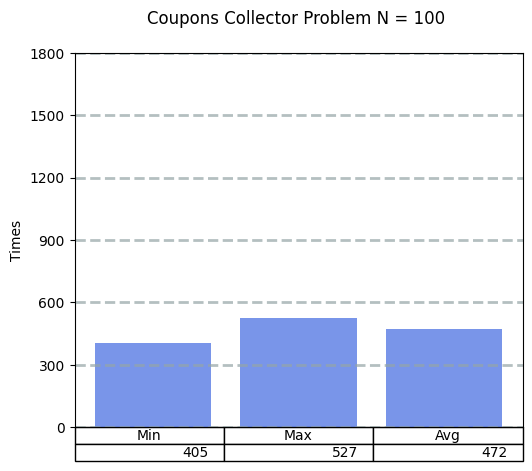

interactive(children=(IntSlider(value=5, description='run_times', max=10000, step=5), Output()), _dom_classes=…

<function __main__.plot_func(run_times)>

In [51]:
# Create 10,000 simulations and get the results
simulations = create_simulations(no_distinct_coupons, run_times)

# Record all statistical values after 1, 2, 3 ..., n-1, n simulations
minimum_values, maximum_values, average_values = create_statistics_after_n_simulations(simulations)

# Setup parameters for the visualisation
cell_texts = list(zip(minimum_values, maximum_values, average_values))

# Run the interactive visualisation
cell_texts = list(zip(minimum_values, maximum_values, average_values))
interact(plot_func, run_times = widgets.IntSlider(value=5, min=0, max=10000,step=5))

## Animated Visualisation

In [14]:
@gif.frame
def plot(run_no):
    
    #Plot the bar plot for three values: min, max, and average
    cell_text = cell_texts[run_no - 1]
    plt.bar(range(len(cell_text)), cell_text, color='royalblue', alpha=0.7)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

    # Add a table at the bottom of the axes
    the_table = plt.table(cellText=[cell_text],
                          colLabels=columns,
                          loc='bottom')
    the_table.scale(1,3)
    
    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.1)
    plt.ylabel(f"Times")
    plt.yticks(values * value_increment, ['%d' % val for val in values])
    plt.xticks([])
    plt.title(f'Coupons Collector Problem N = {no_distinct_coupons}')
    
    # adjusting the main plot to make space for our sliders
    plt.subplots_adjust(left=0.25, bottom=0.25)
    
    axcolor = 'lightgoldenrodyellow'
    axrun = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor, )
    IntSlider(axrun, 'Times', 0, run_times, valinit=run_no, valstep = 1, orientation="vertical")
    

frames = []
durations = []

for run_no in tqdm(range(run_times)):
    frame = plot(run_no)
    frames.append(frame)
    durations.append(1)
    if run_no == run_times - 1:
        durations.append(100)

gif.save(frames, f"{no_distinct_coupons}_coupons_with_{run_times}_simulations.gif", duration=durations)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.31it/s]
